In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import glob
from PIL import Image

%matplotlib inline

IMG_WIDTH = 40
IMG_HEIGHT = 40

def load_gray_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT), interpolation = cv2.INTER_AREA) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


def graytorgb(img):
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    return img

def loadfaces(prefix):
    ret = []
    for img_path in glob.glob('./faces/' + prefix + '*.jpg'):
        ret.append(load_gray_image(img_path))
    return ret

def subplot(imgs):
    plt.figure(figsize=(20,4))
    columns = 5
    for i, image in enumerate(imgs):
        plt.subplot(len(imgs) / columns + 1, columns, i + 1)
        plt.imshow(graytorgb(image))

def subplot_medias(imgs, titles):
    plt.figure(figsize=(20,6))
    columns = 5
    for i, image in enumerate(imgs):
        sub = plt.subplot(len(imgs) / columns + 1, columns, i + 1)
        sub.title.set_text(titles[i])
        plt.imshow(graytorgb(image))

def img_to_row(img):
    return img.flatten().astype(np.float64)

def img_media(act_base):
    vect = np.zeros(act_base[0].shape[0] * act_base[0].shape[0])
    for i, image in enumerate(act_base):
        vect += (img_to_row(image))
    vect /= len(act_base)
    return vect

def img_media_reshape(act_base, media):
    mat = np.reshape(media, act_base[0].shape).astype(np.uint8)
    return mat

# sandra
sandra = loadfaces("sandra")
angelina = loadfaces("angelina")
jennifer = loadfaces("jennifer")
obama = loadfaces("obama")
bush = loadfaces("bush")

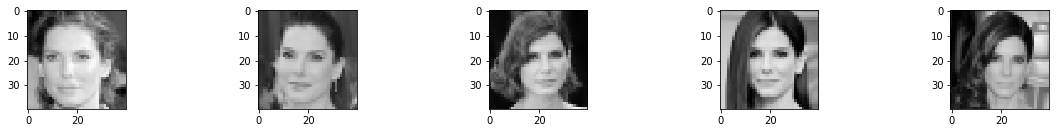

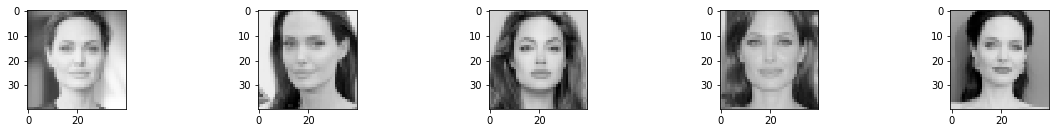

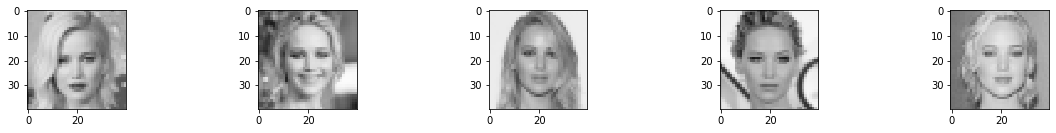

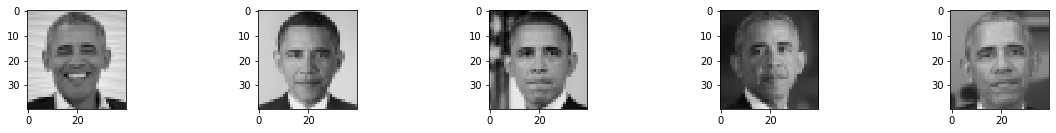

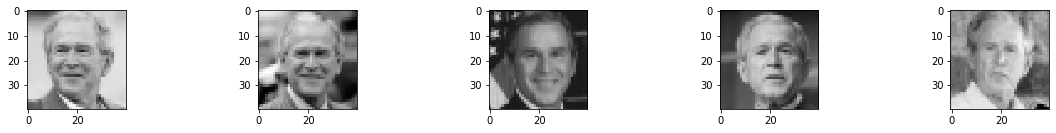

In [2]:
# Plot
subplot(sandra)
subplot(angelina)
subplot(jennifer)
subplot(obama)
subplot(bush)
plt.show()

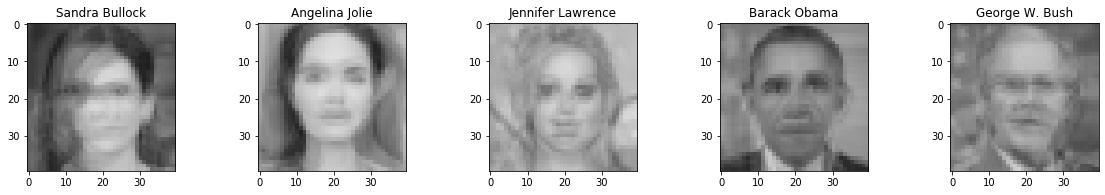

In [3]:
media_s = img_media(sandra)
media_a = img_media(angelina)
media_j = img_media(jennifer)
media_o = img_media(obama)
media_b = img_media(bush)

media_s_r = img_media_reshape(sandra, media_s)
media_a_r = img_media_reshape(angelina, media_a)
media_j_r = img_media_reshape(jennifer, media_j)
media_o_r = img_media_reshape(obama, media_o)
media_b_r = img_media_reshape(bush, media_b)

medias = []
medias.append(media_s_r)
medias.append(media_a_r)
medias.append(media_j_r)
medias.append(media_o_r)
medias.append(media_b_r)
subplot_medias(medias, ("Sandra Bullock", "Angelina Jolie", "Jennifer Lawrence", "Barack Obama", "George W. Bush",))

plt.show()

In [9]:
def gen_D(db):
    D = []
    for act_i, act in enumerate(db):
        for i, img in enumerate(act):
            D.append(img.flatten())
    return np.matrix(D)

D_orig = gen_D((sandra,angelina,jennifer,obama,bush))

print(D_orig.shape)
A = D_orig.T.dot(D_orig)

autovalores, autovetores = np.linalg.eig(A)
#autovalores = autovalores[:25]
#autovetores = autovetores[:,:25]

proj_s = media_s * autovalores.T
print(proj_s[:25])

(25, 1600)
[13590304.91535476  -323282.82468249  -275395.7941795   -283121.94854775
  -329624.84808838  -338433.17300689  -367964.26725167   392457.27773116
   415228.56071884   433717.14911663   463353.00821636   407989.07402991
   430170.91690415   406283.12418117  -449752.0969848    456900.20793973
   467633.28289021   500981.33516723   495424.75369096   413005.91548888
  -481490.91489231  -451581.71623827  -439032.83816871   410234.14023015
  -473571.49811134]
